In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Exploratory Data Analysis of the Titanic Dataset



# Importing API's for data prepocessing and modelling.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.cluster import dbscan, k_means
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, FunctionTransformer, Pipeline
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
import xgboost as xgb
import warnings
from scipy.stats import randint
# Suppress all warnings
warnings.filterwarnings('ignore')


**** READ THE CSV FILE AND CREATE A DATAFRAME FOR THE TRAINING DATA AND  TEST DATA. ****

In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')


**SEE THE FIRST  AND LAST FIVE ENTRIES OF THE TEST AND TRAINING DATA.**

In [4]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


**LET US EXAMINE THE NUMBER OF ROWS AND COLUMNS IN THE TEST AND TRAINING DATA.**

In [8]:
print(f"The training data has {train_data.shape[0]} rows and {train_data.shape[1]} columns.")
print(f"The test data has {test_data.shape[0]} rows and {test_data.shape[1]} columns.")

The training data has 891 rows and 12 columns.
The test data has 418 rows and 11 columns.


**OUR GOAL IS TO CREATE A MODEL THAT PREDICTS WHETHER THE PASSENGERS SURVIVED OR NOT BASED ON THEIR OTHER DESCRIBED FEARTURES IN THE DATASET.**

**WE EXAMINE THE ENTRIES OF THE TRAINING AND TEST DATA MORE EXTENSIVELY THROUGH SOME VISUAL AIDS AND PANDAS COMMANDS.**

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**WE NOTE THAT EVERY PASSENGER IS GIVEN AN UNIQUE ID. THEREFORE, WE CHANGE THE INDEX OF THE TRAINING AND TEST DATA TO PASSENGERId.**

In [10]:
train_data.set_index("PassengerId",inplace=True)
test_data.set_index("PassengerId",inplace=True)

**WE CHANGE THE OBJECT DATA TYPE TO CATEGORY. MOREOVER, WE ALSO CHANGE THE DATA TYPE OF PCLASS TO CATEGORY (KEEPING IT AS INT TYPE IS ALSO FINE BUT IT WILL BE CONVENIENT TO CHANGE IT TO CATEGORY DATA TYPE SINCE PCLASS CAN BE CLASSIFIED AS ORDINAL CATEGORICAL FEATURE). ALSO, WE CAN REPRESENT THE SURVIVED  COLUMN AS BOOLEAN.**

In [11]:
cat_col = train_data.select_dtypes(include=['object'])
for col in cat_col:
    train_data[col] = train_data[col].astype('category')
    test_data[col] = test_data[col].astype('category')
    
train_data['Pclass'] = train_data['Pclass'].astype('category')
train_data['Survived'] = train_data['Survived'].astype('boolean')
test_data['Pclass'] = test_data['Pclass'].astype('category')
print("We check the data type of the columns again")
print(train_data.info())
print(test_data.info())


    
    


We check the data type of the columns again
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    boolean 
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    category
 10  Embarked  889 non-null    category
dtypes: boolean(1), category(6), float64(2), int64(2)
memory usage: 110.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    

In [12]:
train_data.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**We can combine the columns SipSp and Parch to form a new column " family Size "**

In [13]:
train_data["Family_Size"] = train_data["SibSp"] + train_data["Parch"] + 1
"""
1 is added to inculde the passenger as well in the Family.
"""
train_data["Family_Size"].describe()

test_data["Family_Size"] = test_data["SibSp"] + test_data["Parch"] + 1



**Let us look at the distribution of the various attributes through histograms**

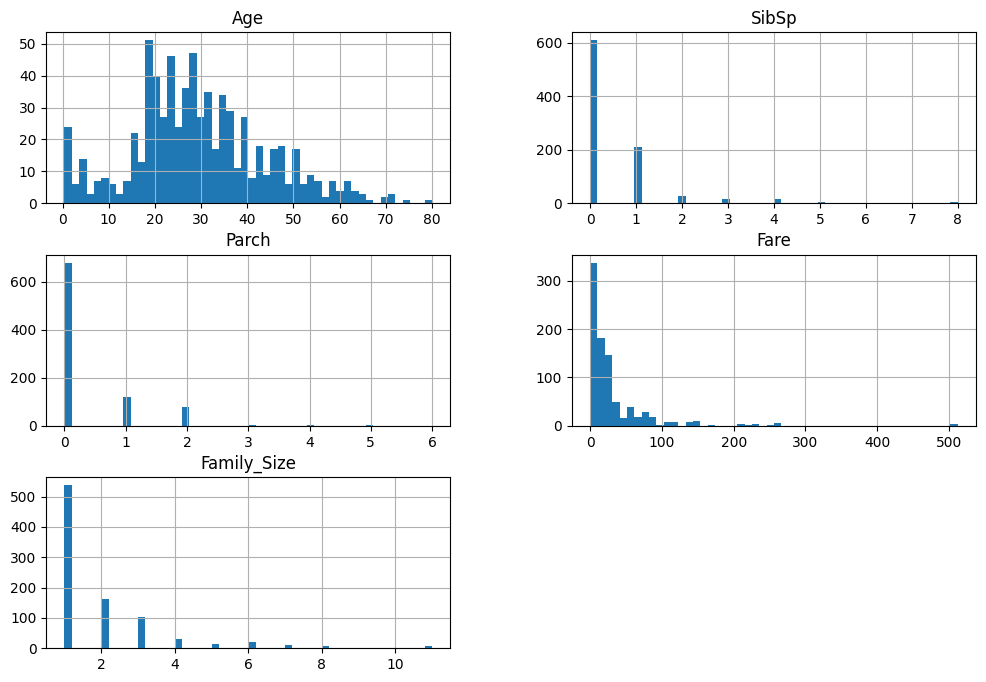

In [14]:
train_data.hist(bins=50,figsize=(12,8),)
plt.show()


**The age distribution is a multimodal distribution whereas all the other attributes have right skewed distribution.**

**LET US NOW CLOSELY LOOK AT THE RELATIONSHIP BETWEEN ATTRIBUTES OF THE TRAINING DATA.**

**FIRSTLY, LET US SEE THE CORRELATION BETWEEN THE NUMERICAL ATTRIBUTES.**

In [15]:

train_data.select_dtypes(include = 'number').corr()

,Age,SibSp,Parch,Fare,Family_Size
Age,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.096067,0.159651,0.216225,1.000000,0.217138
Family_Size,-0.301914,0.890712,0.783111,0.217138,1.000000


**SibSp IS MODERATELY POSTIVE CORRELATED TO Parch and moderately negatively correlated to Age. The new attribute that we have created is strongly correlated to SibSp and Parch for obvious reason and negativly correlated to Age. OTHER THAN THAT WE DO NOT SEE ANY SIGNIFICANT CORRELATION. We have observed that the age attribute had a lot of null values. Let us see if filling those null values would affect the correlation.**

In [16]:
Imputer = SimpleImputer(strategy='mean')
X = Imputer.fit_transform(train_data.select_dtypes(include=np.number))
X_num = pd.DataFrame(data=X,columns=train_data.select_dtypes(include=np.number).columns,index = train_data.index)
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   SibSp        891 non-null    float64
 2   Parch        891 non-null    float64
 3   Fare         891 non-null    float64
 4   Family_Size  891 non-null    float64
dtypes: float64(5)
memory usage: 41.8 KB


In [17]:
X_num.corr()

,Age,SibSp,Parch,Fare,Family_Size
Age,1.000000,-0.232625,-0.179191,0.091566,-0.248512
SibSp,-0.232625,1.000000,0.414838,0.159651,0.890712
Parch,-0.179191,0.414838,1.000000,0.216225,0.783111
Fare,0.091566,0.159651,0.216225,1.000000,0.217138
Family_Size,-0.248512,0.890712,0.783111,0.217138,1.000000


**NEXT, WE OBSERVE HOW THESE NUMERICAL ATTRIBUTES RELATE TO THE TARGET FEATURE.**

In [18]:
num_col_pre = train_data.select_dtypes(include='number', exclude='boolean')
num_col = [col for col in num_col_pre if col != 'PassengerId']


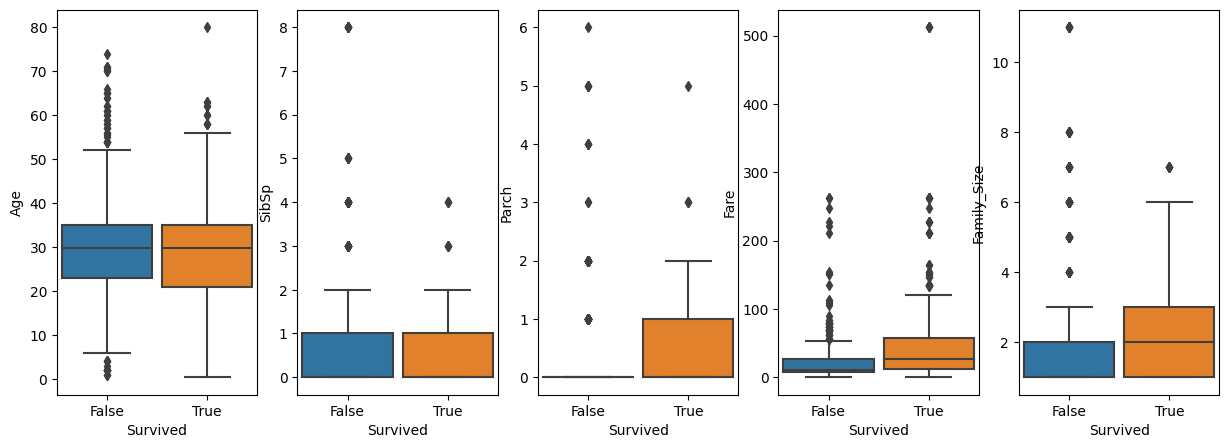

In [19]:
fig, axes = plt.subplots(1,5,figsize=(15,5))
for i in range(len(num_col)): 
    sns.boxplot(x=train_data['Survived'], y = X_num[num_col[i]], ax=axes[i] , width = 0.9)

**WE CANNOT SEE ANY SIGNIFICANT RELATIONSHIP BETWEEN THE NUMERICAL ATTRIBUTES AND THE TARGET FEATURE.**

**Let us detect the outliers in the numerical features of the data.**

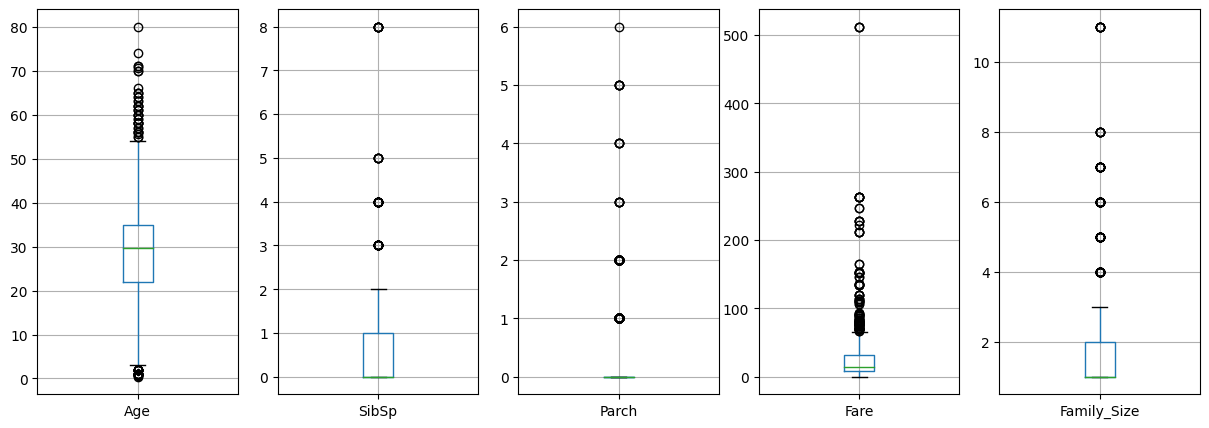

In [20]:
fig, axes = plt.subplots(1,5,figsize=(15,5))
for i in range(len(num_col)): 
    X_num.boxplot(column = num_col[i],ax=axes[i])

#### The consideration of removing or transforming the outliers depends on a lot of things. If the data is wrongly entered, then one might consider to handle the outliers but if the data contains a lot of outliers expressing the variability of the data, then we might not do anything to change the outlier instances. In that case, for training we might consider models that are more robust to outliers. Models based on ditance measure are prone to be affected by outliers. Most convenient models in this are tree based models that are more robust to outliers.  

#### Let us now examine the categorical attributes.

In [21]:
cat_data = train_data.select_dtypes(include=["category","boolean"])
def count_of_each_attribute():
    for col in cat_data.columns:
        print(cat_data[col].describe())

count_of_each_attribute()

count       891
unique        2
top       False
freq        549
Name: Survived, dtype: object
count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64
count                     891
unique                    891
top       Abbing, Mr. Anthony
freq                        1
Name: Name, dtype: object
count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object
count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


**We do not get use any useful information from the features Name, Cabin and Ticket because there are too many categories for each of these attributes to consider. Therefore, we consider only Pclass, Sex and Embarked.**

**LET US LOOK AT RELATIONSHIP BETWEEN THE NUMERICAL AND CATEGORICAL FEATURES.**

**NUMERICAL FEATURES VS Pclass**

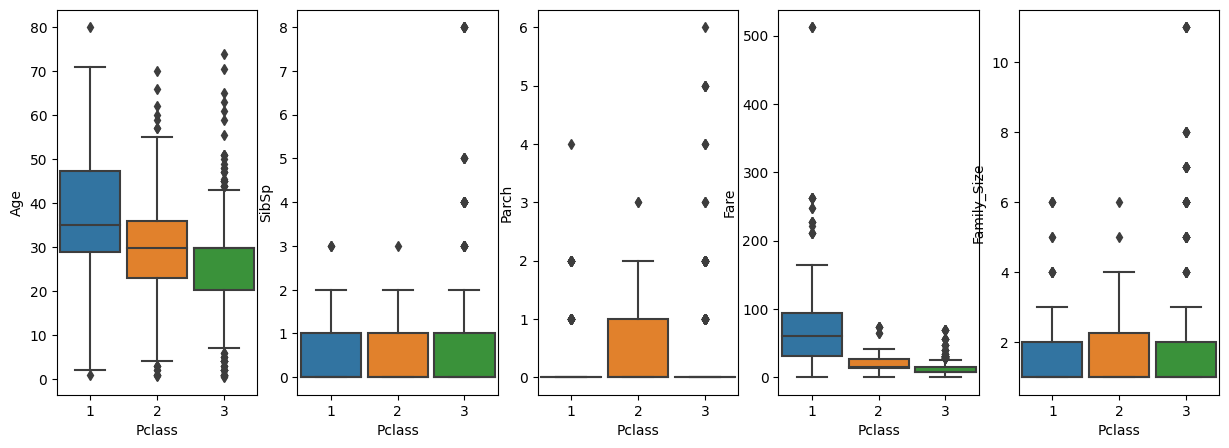

In [22]:

fig, axes = plt.subplots(1,5,figsize=(15,5))
for i in range(len(num_col)): 
    sns.boxplot(x=train_data['Pclass'], y = X_num[num_col[i]], ax=axes[i] , width = 0.9)

**Pclass HAS A STRONG RELATIONSHIP WITH AGE, PARCH AND FARE. WE CAN CLEARLY SEE HOW THE DISTRIBUTIONS OF THE NUMERICAL ATTRIBUTES CHANGE WITH DIFFERENT VALUES OF THE Pclass.**

**Numerical vs Sex.**

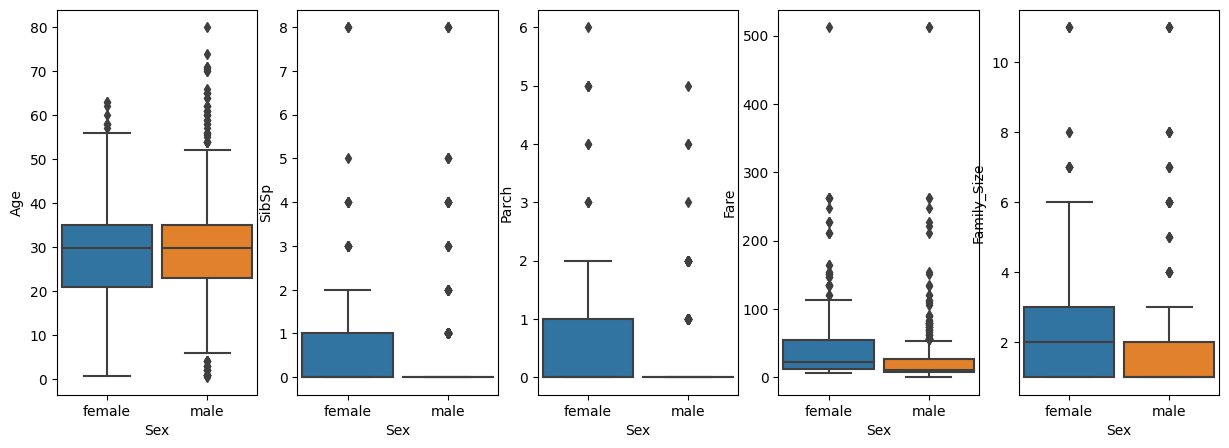

In [23]:
fig, axes = plt.subplots(1,5,figsize=(15,5))
for i in range(len(num_col)): 
    sns.boxplot(x=train_data['Sex'], y = X_num[num_col[i]], ax=axes[i] , width = 0.9)

**No significant correlation between any of the numerical attributes and the Sex attribute.**

**Numerical vs Embarked.**

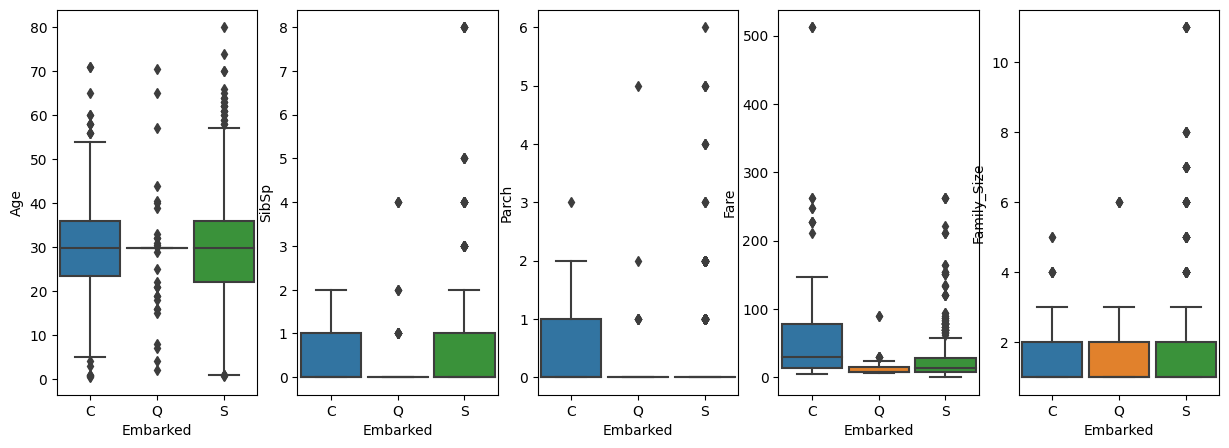

In [24]:
fig, axes = plt.subplots(1,5,figsize=(15,5))
for i in range(len(num_col)): 
    sns.boxplot(x=train_data['Embarked'], y = X_num[num_col[i]], ax=axes[i] , width = 0.9)

**Again no significant correlation.**

#### We are done with the exploratory data analysis part. We can start with the preprocessing part.

In [25]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median")
                            ,StandardScaler())

In [26]:
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent")
                            ,OneHotEncoder(handle_unknown="ignore"))

In [27]:
def drop_attribute(data,lst = None):
    for attr in lst:
        data.drop(columns=attr, inplace=True)
        
def transform_frame():
    return FunctionTransformer(drop_attribute)
    

In [28]:
preprocessing = ColumnTransformer(
[("num",num_pipeline,make_column_selector(dtype_include=np.number)),
("cat",cat_pipeline,make_column_selector(dtype_include='category'))])


In [29]:
X_train =  train_data[['Pclass', 'Sex', 'Age', 
       'Fare', 'Embarked', 'Family_Size']]
Y_train = train_data['Survived']

In [30]:

train_data_preprocessed = preprocessing.fit_transform(X_train)
train_data_preprocessed.shape

(891, 11)

In [31]:
X_train_preprocessed = pd.DataFrame(train_data_preprocessed,
                                    columns=preprocessing.get_feature_names_out(),
                                   index = train_data.index)

#### We can now train various models on the training set. We can use GridSearch CV to control and choose optimal hyperparameters for our model.

### Training a linear model (SVC)

In [32]:
SVC_model = Pipeline(
[
    ("preprocessing", preprocessing),
    ("SVC", SVC(random_state=42))
]
)

In [33]:
parameters_grid = [
    {"SVC__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
    "SVC__C":randint(1,10),
    "SVC__degree":randint(3,10)} 
    # add the name of the model defined in the pipeline followed by a double underscore and then the parameter's name.
]

In [34]:
Random_search_svc = RandomizedSearchCV(SVC_model, parameters_grid, cv=3,
                          ) 
# running the model on various hyperparamaters based on a score to find the best model
Random_search_svc.fit(X_train,Y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7a26aec64910>),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(str...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7a26aec64dc0>)])),
                                             ('SVC', SVC(random_state=42))]),
                   param_distributions=[{'SVC__C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a26aec65390>,
                                         'SVC__degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a26aec670d0>,
                                         'SVC__kernel': ['linear', 'poly',
                                                         'rbf', 'sigmoid']}])

In [35]:
Random_search_svc.best_params_

{'SVC__C': 5, 'SVC__degree': 9, 'SVC__kernel': 'rbf'}

In [36]:
svc_final_model = Random_search_svc.best_estimator_

In [37]:
cv_res = pd.DataFrame(Random_search_svc.cv_results_)
cv_res.sort_values(by="mean_test_score",ascending=False, inplace=True)
[...]
cv_res


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVC__C,param_SVC__degree,param_SVC__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.026816,0.000434,0.012953,0.000371,5,9,rbf,"{'SVC__C': 5, 'SVC__degree': 9, 'SVC__kernel':...",0.808081,0.824916,0.838384,0.823793,0.012397,1
8,0.026817,0.000600,0.012415,0.000173,8,7,rbf,"{'SVC__C': 8, 'SVC__degree': 7, 'SVC__kernel':...",0.808081,0.824916,0.831650,0.821549,0.009912,2
4,0.027538,0.000672,0.012713,0.000205,9,3,rbf,"{'SVC__C': 9, 'SVC__degree': 3, 'SVC__kernel':...",0.801347,0.824916,0.828283,0.818182,0.011983,3
2,0.033658,0.007491,0.009989,0.000130,4,3,linear,"{'SVC__C': 4, 'SVC__degree': 3, 'SVC__kernel':...",0.791246,0.797980,0.771044,0.786756,0.011446,4
9,0.041670,0.011148,0.010024,0.000069,9,7,linear,"{'SVC__C': 9, 'SVC__degree': 7, 'SVC__kernel':...",0.791246,0.797980,0.771044,0.786756,0.011446,4
1,0.044309,0.004344,0.010398,0.000063,9,9,poly,"{'SVC__C': 9, 'SVC__degree': 9, 'SVC__kernel':...",0.747475,0.801347,0.774411,0.774411,0.021993,6
5,0.027841,0.000972,0.012178,0.000139,1,9,sigmoid,"{'SVC__C': 1, 'SVC__degree': 9, 'SVC__kernel':...",0.649832,0.666667,0.690236,0.668911,0.016571,7
0,0.028082,0.001054,0.012003,0.000256,4,6,sigmoid,"{'SVC__C': 4, 'SVC__degree': 6, 'SVC__kernel':...",0.649832,0.653199,0.686869,0.663300,0.016722,8
6,0.026815,0.000517,0.011611,0.000241,4,4,sigmoid,"{'SVC__C': 4, 'SVC__degree': 4, 'SVC__kernel':...",0.649832,0.653199,0.686869,0.663300,0.016722,8
7,0.026967,0.000881,0.011774,0.000161,4,5,sigmoid,"{'SVC__C': 4, 'SVC__degree': 5, 'SVC__kernel':...",0.649832,0.653199,0.686869,0.663300,0.016722,8


In [38]:
Y_pred = svc_final_model.predict(X_train)

In [39]:
acc = classification_report(Y_pred,Y_train)
print(acc)

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       637
         1.0       0.67      0.90      0.77       254

    accuracy                           0.84       891
   macro avg       0.81      0.86      0.82       891
weighted avg       0.87      0.84      0.85       891



In [40]:
X_test =  test_data[['Pclass', 'Sex', 'Age', 
       'Fare', 'Embarked', 'Family_Size']]


In [41]:
svc_test_predict = svc_final_model.predict(X_test)

### Using a Random Forest Classifier

In [42]:

Random_Forest_model = Pipeline(
[
    ("preprocessing", preprocessing),
    ("Random_forest", RandomForestClassifier(random_state=42))
])

parameters_rf = [{"Random_forest__max_features": randint(1,10),
                 "Random_forest__min_samples_leaf":randint(1,5)}]

Random_forest_cv = RandomizedSearchCV(Random_Forest_model,param_distributions=parameters_rf,cv=10)

Random_forest_cv.fit(X_train,Y_train)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7a26aec64910>),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(st...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7a26aec64dc0>)])),
                                             ('Random_forest',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions=[{'Random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a26aec65150>,
                                         'Random_forest__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a26ae80c460>}])

In [43]:
Rf_final_model = Random_forest_cv.best_estimator_


In [44]:
Y_pred_rf = Rf_final_model.predict(X_train)
acc_rf = classification_report(Y_pred_rf,Y_train)

In [45]:
print(acc_rf)

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.92       590
         1.0       0.80      0.91      0.85       301

    accuracy                           0.89       891
   macro avg       0.88      0.90      0.88       891
weighted avg       0.90      0.89      0.89       891



In [46]:
y_pred = pd.DataFrame({'Survived':Rf_final_model.predict(X_test)},index = test_data.index)
print(y_pred)

             Survived
PassengerId          
892               0.0
893               0.0
894               0.0
895               0.0
896               1.0
...               ...
1305              0.0
1306              1.0
1307              0.0
1308              0.0
1309              0.0

[418 rows x 1 columns]


In [47]:
y_pred.to_csv('submission.csv', index = False)